In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [2]:
df = pd.DataFrame(pd.read_csv("CV_Reengineeirng_Defects.csv"))
df.head()

,URL,Repo owner,Repo name,Issue #,Repo type,Research Prototype,Repo creation time,Issue creation time,Time Slot/d,Label,Framework,Same Code?,Same Data?,Impacts,Part of Implementation,Project Type,Reporter,Defect types,Root Causes,Manifestation
0,https://github.com/chenyuntc/simple-faster-rcn...,chenyuntc,simple-faster-rcnn-pytorch,42,Solo Repository,No,2017-12-09T13:13:54Z,2018-05-07T14:29:50Z,149,NaN,pytorch,yes,Not mentioned,Crash,Environment,"User ""fork""",Re-user,External interface,API defects,Basic defects
1,https://github.com/chenyuntc/simple-faster-rcn...,chenyuntc,simple-faster-rcnn-pytorch,42,Solo Repository,No,2017-12-09T13:13:54Z,2018-05-07T14:29:50Z,149,NaN,pytorch,yes,Not mentioned,Crash,Environment,"User ""fork""",Re-user,External interface,API defects,Basic defects
2,https://github.com/Duankaiwen/CenterNet/issues/36,Duankaiwen,CenterNet,36,Solo Repository,Yes,2019-04-16T16:18:23Z,2019-05-17T01:42:36Z,30,NaN,Pytorch,Yes,Yes,Low frequency type,Data pipeline,"User ""fork""",Adaptor,Assignment/initialization,Corrupt Data,Basic defects
3,https://github.com/Duankaiwen/CenterNet/issues/44,Duankaiwen,CenterNet,44,Solo Repository,Yes,2019-04-16T16:18:23Z,2019-05-29T12:51:26Z,42,NaN,Pytorch,Yes,Yes,Crash,Data pipeline,"User ""fork""",Adaptor,Assignment/initialization,Corrupt Data,Basic defects
4,https://github.com/endernewton/tf-faster-rcnn/...,endernewton,tf-faster-rcnn,107,Solo Repository,No,2017-01-23T19:51:32Z,2017-05-26T06:42:26Z,122,NaN,Tensorflow,Yes,No,Numerical Instability,Training,"User ""fork""",Adaptor,Algorithm/method,Training configurations,Evolutionary defects


In [9]:
df.iloc[:, 19]

0                Basic defects
1                Basic defects
2                Basic defects
3                Basic defects
4         Evolutionary defects
                ...           
336              Basic defects
337    Reproducibility defects
338    Reproducibility defects
339       Evolutionary defects
340              Basic defects
Name: Manifestation, Length: 341, dtype: object

In [24]:
main_col = "Project Type"
group_col = "Manifestation"

In [25]:
counts = df.groupby(group_col)[main_col].value_counts(normalize=True)

In [26]:
for i, (group, count) in enumerate(counts.groupby(level=0)):
    print(group, count)

Basic defects Manifestation  Project Type      
Basic defects  User "fork"           0.895928
               Major replication     0.099548
               Research Prototype    0.004525
Name: Project Type, dtype: float64
Evolutionary defects Manifestation         Project Type      
Evolutionary defects  User "fork"           0.535714
                      Major replication     0.369048
                      Research Prototype    0.095238
Name: Project Type, dtype: float64
Reproducibility defects Manifestation            Project Type      
Reproducibility defects  User "fork"           0.833333
                         Major replication     0.138889
                         Research Prototype    0.027778
Name: Project Type, dtype: float64


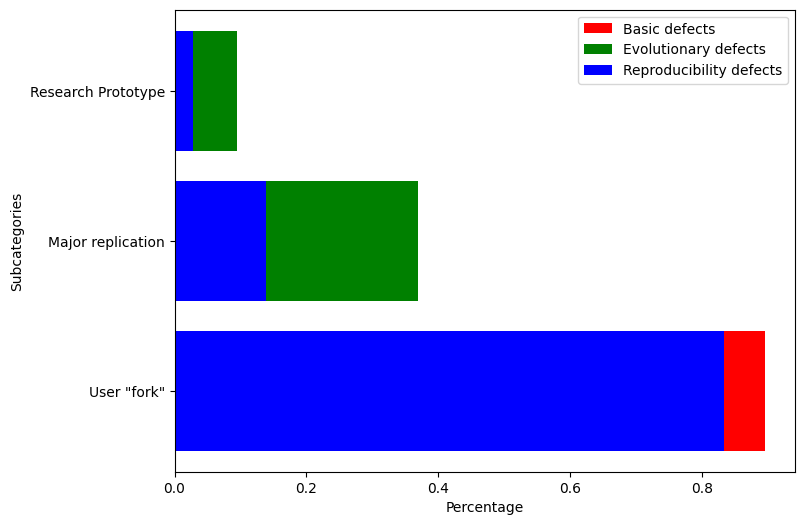

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ["red", "green", "blue"]  # define a list of colors for each subcategory
for i, (group, count) in enumerate(counts.groupby(level=0)):
    ax.barh(count.index.get_level_values(1), count, color=colors[i % len(colors)], label=group)
ax.set_xlabel("Percentage")
ax.set_ylabel("Subcategories")
ax.legend()

plt.show()

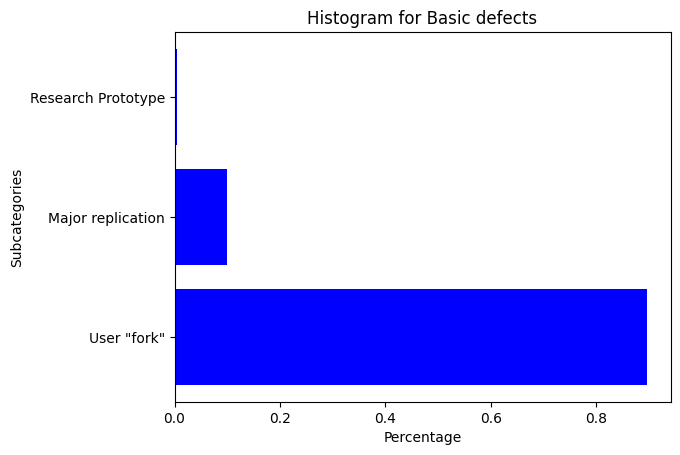

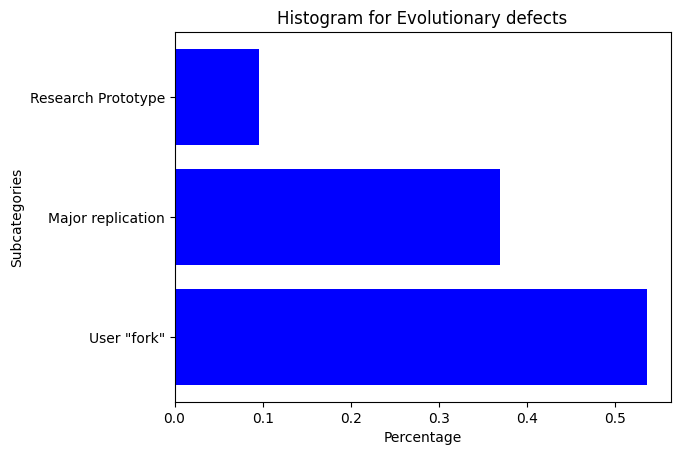

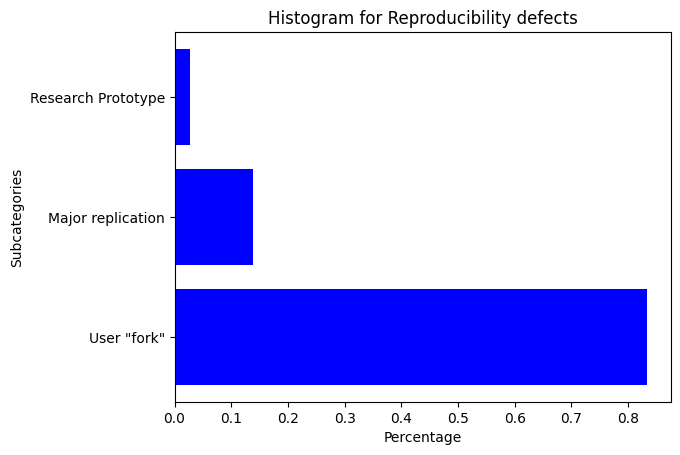

In [28]:
group_vals = df[group_col].unique()

# Plot a separate histogram for each group value
for group_val in group_vals:
    # Filter the data for the current group value
    group_data = df[df[group_col] == group_val]

    # Calculate the percentage of each subcategory in the main column
    subcat_perc = group_data[main_col].value_counts(normalize=True)

    # Plot the histogram
    plt.barh(subcat_perc.index, subcat_perc.values, color='blue')
    plt.title(f"Histogram for {group_val}")
    plt.xlabel("Percentage")
    plt.ylabel("Subcategories")
    plt.show()

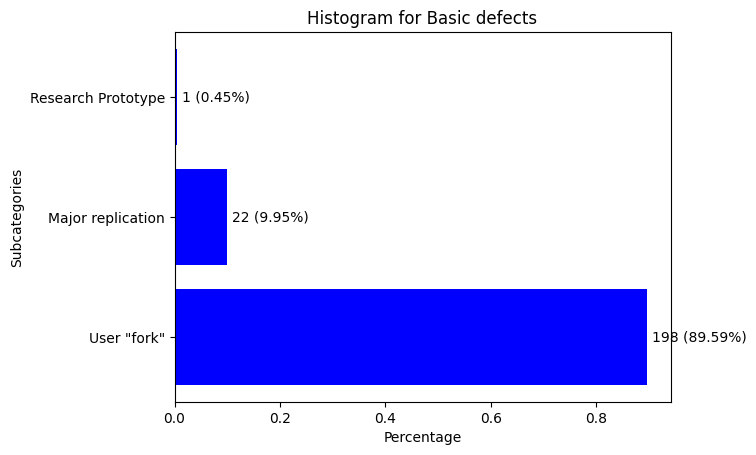

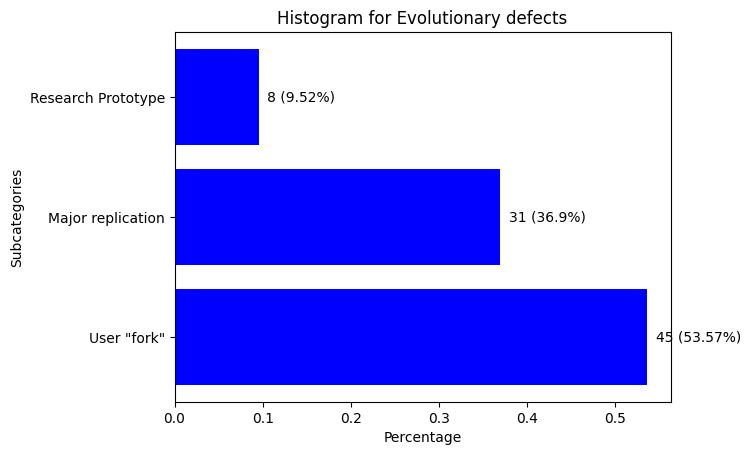

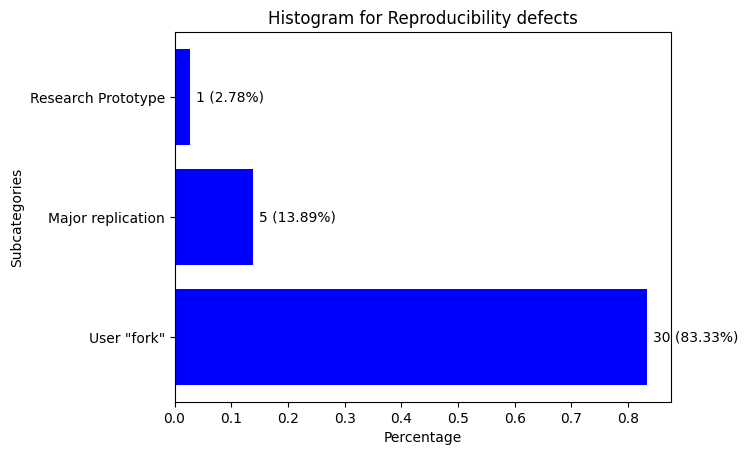

In [29]:
group_vals = df[group_col].unique()

# Plot a separate histogram for each group value
for group_val in group_vals:
    # Filter the data for the current group value
    group_data = df[df[group_col] == group_val]

    # Calculate the percentage of each subcategory in the main column
    subcat_perc = group_data[main_col].value_counts(normalize=True)

    # Plot the histogram
    fig, ax = plt.subplots()
    ax.barh(subcat_perc.index, subcat_perc.values, color='blue')
    ax.set_title(f"Histogram for {group_val}")
    ax.set_xlabel("Percentage")
    ax.set_ylabel("Subcategories")

    # Add data labels for each subcategory
    for i, v in enumerate(subcat_perc.values):
        subcat = subcat_perc.index[i]
        count = group_data[main_col].value_counts()[subcat]
        percent = round(v * 100, 2)
        ax.text(v + 0.01, i, f"{count} ({percent}%)", va='center')

    plt.show()

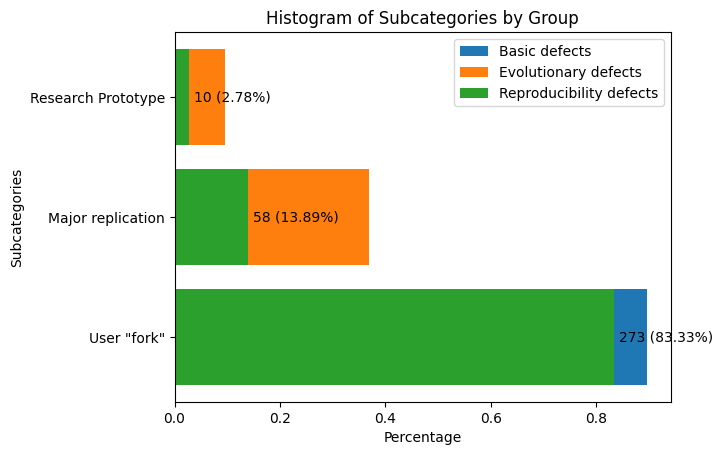

In [31]:
group_vals = df[group_col].unique()

# Set up the figure
fig, ax = plt.subplots()

# Plot a separate histogram for each group value
for group_val in group_vals:
    # Filter the data for the current group value
    group_data = df[df[group_col] == group_val]

    # Calculate the percentage of each subcategory in the main column
    subcat_perc = group_data[main_col].value_counts(normalize=True)

    # Plot the histogram
    ax.barh(subcat_perc.index, subcat_perc.values, label=group_val)

# Add labels and legend
ax.set_title("Histogram of Subcategories by Group")
ax.set_xlabel("Percentage")
ax.set_ylabel("Subcategories")
ax.legend()

# Add data labels for each subcategory
for i, v in enumerate(subcat_perc.values):
    subcat = subcat_perc.index[i]
    count = df[main_col].value_counts()[subcat]
    percent = round(v * 100, 2)
    ax.text(v + 0.01, i, f"{count} ({percent}%)", va='center')

plt.show()

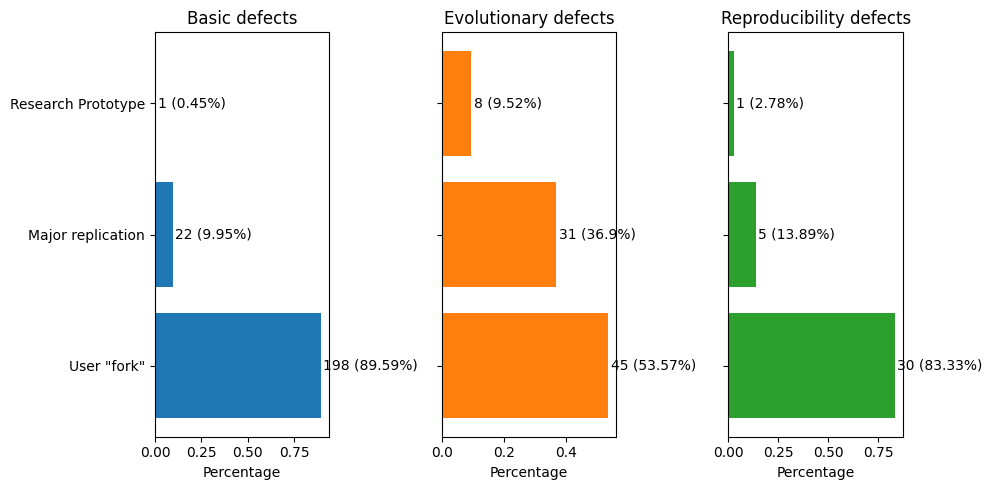

In [33]:
group_vals = df[group_col].unique()

# Set up the subplots
fig, axs = plt.subplots(1, len(group_vals), sharey=True, figsize=(10, 5))

# Iterate over each group value and create a separate histogram
for i, group_val in enumerate(group_vals):
    # Filter the data for the current group value
    group_data = df[df[group_col] == group_val]

    # Calculate the percentage of each subcategory in the main column
    subcat_perc = group_data[main_col].value_counts(normalize=True)

    # Get the y-axis ticks and labels
    yticks = np.arange(len(subcat_perc))
    ylabels = subcat_perc.index

    # Plot the histogram
    axs[i].barh(yticks, subcat_perc.values, color='C{}'.format(i))
    axs[i].set_title(group_val)
    axs[i].set_xlabel("Percentage")

    # Add y-axis ticks and labels
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ylabels)

    # Add data labels for each subcategory
    for j, v in enumerate(subcat_perc.values):
        subcat = subcat_perc.index[j]
        count = group_data[main_col].value_counts()[subcat]
        percent = round(v * 100, 2)
        axs[i].text(v + 0.01, j, f"{count} ({percent}%)", va='center')

plt.tight_layout()
plt.show()

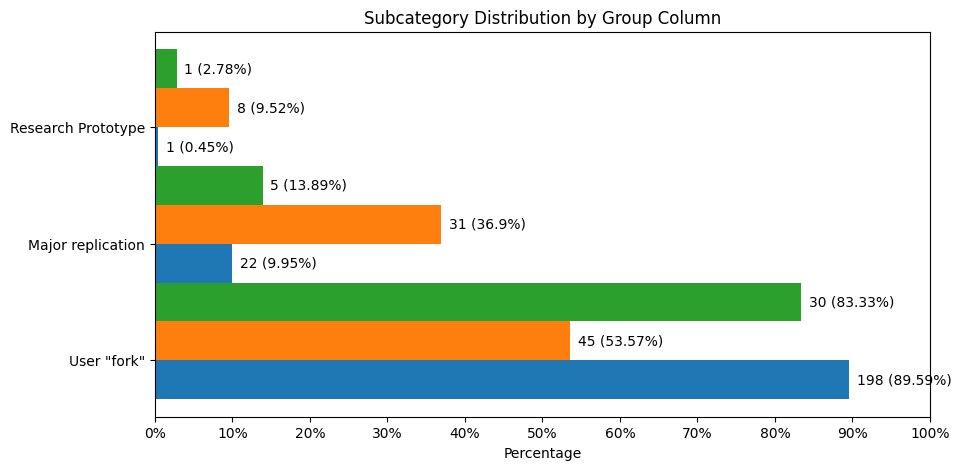

In [34]:
group_vals = df[group_col].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Set up x-axis ticks and labels
xticks = np.arange(0, 1.1, 0.1)
xlabels = ["{}%".format(int(x*100)) for x in xticks]

# Iterate over each group value and create a separate histogram
for i, group_val in enumerate(group_vals):
    # Filter the data for the current group value
    group_data = df[df[group_col] == group_val]

    # Calculate the percentage of each subcategory in the main column
    subcat_perc = group_data[main_col].value_counts(normalize=True)

    # Get the y-axis ticks and labels
    yticks = np.arange(len(subcat_perc))
    ylabels = subcat_perc.index

    # Plot the histogram
    ax.barh(yticks+i/len(group_vals), subcat_perc.values, height=1/len(group_vals), color='C{}'.format(i))
    ax.set_title("Subcategory Distribution by Group Column")
    ax.set_xlabel("Percentage")
    ax.set_yticks(yticks+(1/len(group_vals)/2))
    ax.set_yticklabels(ylabels)

    # Add data labels for each subcategory
    for j, v in enumerate(subcat_perc.values):
        subcat = subcat_perc.index[j]
        count = group_data[main_col].value_counts()[subcat]
        percent = round(v * 100, 2)
        ax.text(v + 0.01, j+(i/len(group_vals)), f"{count} ({percent}%)", va='center')

# Set x-axis ticks and labels
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


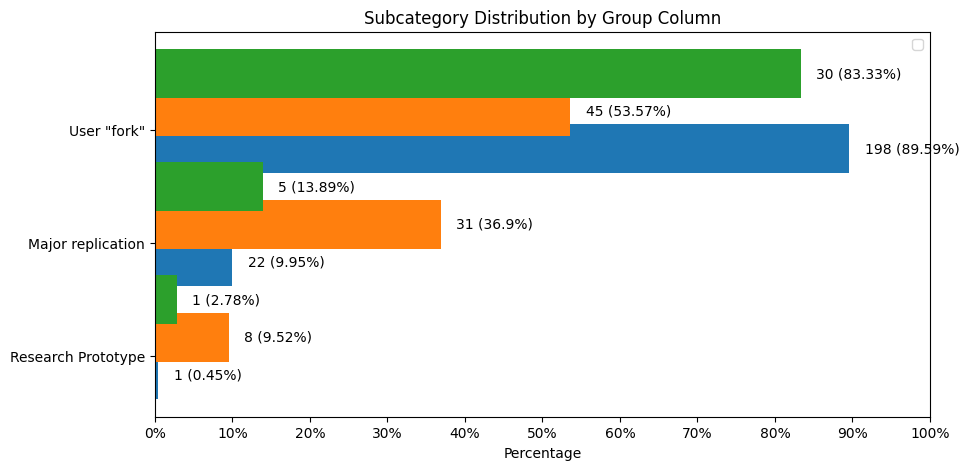

In [42]:
# Get the unique values in the group column
group_vals = df[group_col].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Set up x-axis ticks and labels
xticks = np.arange(0, 1.1, 0.1)
xlabels = ["{}%".format(int(x*100)) for x in xticks]

# Iterate over each group value and create a separate histogram
for i, group_val in enumerate(group_vals):
    # Filter the data for the current group value
    group_data = df[df[group_col] == group_val]

    # Calculate the percentage of each subcategory in the main column
    subcat_perc = group_data[main_col].value_counts(normalize=True).sort_values()

    # Sort the subcategories by value counts
    group_data_sorted = group_data.groupby(main_col).size().reset_index(name='counts').sort_values(['counts', main_col])
    subcat_labels_sorted = group_data_sorted[main_col].tolist()

    # Get the y-axis ticks and labels
    yticks = np.arange(len(subcat_perc))
    ylabels = subcat_labels_sorted

    # Plot the histogram
    ax.barh(yticks+i/len(group_vals), subcat_perc[subcat_labels_sorted].values, height=1/len(group_vals)+0.1, color='C{}'.format(i))
    ax.set_title("Subcategory Distribution by Group Column")
    ax.set_xlabel("Percentage")
    ax.set_yticks(yticks+(1/len(group_vals)/2))
    ax.set_yticklabels(ylabels)

    # Add data labels for each subcategory
    for j, v in enumerate(subcat_perc[subcat_labels_sorted].values):
        subcat = subcat_labels_sorted[j]
        count = group_data[main_col].value_counts()[subcat]
        percent = round(v * 100, 2)
        ax.text(v + 0.01, j+(i/len(group_vals)), f"{count} ({percent}%)", va='center')

# Set x-axis ticks and labels
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

plt.legend()
plt.show()

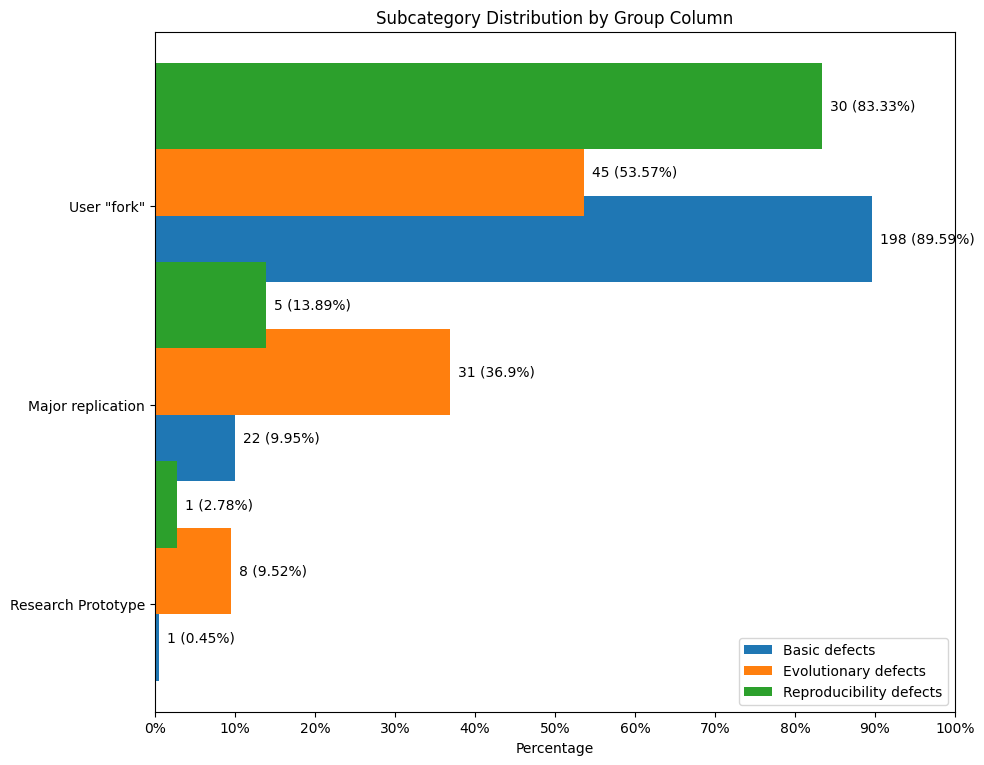

In [54]:
group_vals = df[group_col].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Set up x-axis ticks and labels
xticks = np.arange(0, 1.1, 0.1)
xlabels = ["{}%".format(int(x*100)) for x in xticks]

# Iterate over each group value and create a separate histogram
for i, group_val in enumerate(group_vals):
    # Filter the data for the current group value
    group_data = df[df[group_col] == group_val]

    # Calculate the percentage of each subcategory in the main column
    subcat_perc = group_data[main_col].value_counts(normalize=True).sort_values()

    # Sort the subcategories by value counts
    group_data_sorted = group_data.groupby(main_col).size().reset_index(name='counts').sort_values(['counts', main_col])
    subcat_labels_sorted = group_data_sorted[main_col].tolist()

    # Get the y-axis ticks and labels
    yticks = np.arange(len(subcat_perc))
    ylabels = subcat_labels_sorted

    # Plot the histogram
    ax.barh(yticks+i/len(group_vals), subcat_perc[subcat_labels_sorted].values, height=1/len(group_vals)+0.1, color='C{}'.format(i), label=group_val)
    ax.set_title("Subcategory Distribution by Group Column")
    ax.set_xlabel("Percentage")
    ax.set_yticks(yticks+(1/len(group_vals)/2))
    ax.set_yticklabels(ylabels)

    # Add data labels for each subcategory
    for j, v in enumerate(subcat_perc[subcat_labels_sorted].values):
        subcat = subcat_labels_sorted[j]
        count = group_data[main_col].value_counts()[subcat]
        percent = round(v * 100, 2)
        ax.text(v + 0.01, j+(i/len(group_vals)), f"{count} ({percent}%)", va='center')

# Set x-axis ticks and labels
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

# Add legend
ax.legend(loc='lower right')

# Adjust figure margins
fig.subplots_adjust(top=0.95, bottom=0.1, left=0.15, right=0.95, hspace=0.2, wspace=0.2)

plt.show()

C:\Users\wenxi\AppData\Local\Temp\ipykernel_17564\5670938.py:16: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  subcat_perc = group_data.groupby([main_col, group_col]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())
C:\Users\wenxi\AppData\Local\Temp\ipykernel_17564\5670938.py:16: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use

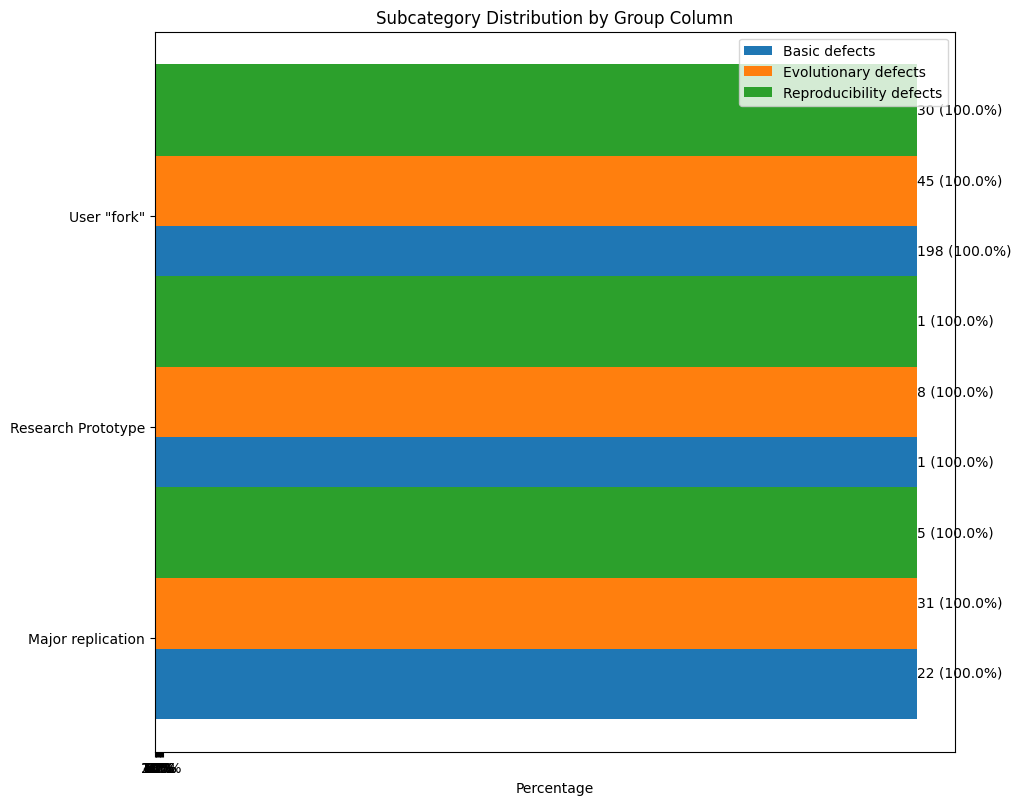

In [57]:
group_vals = df[group_col].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Set up x-axis ticks and labels
xticks = np.arange(0, 1.1, 0.1)
xlabels = ["{}%".format(int(x*100)) for x in xticks]

# Iterate over each group value and create a separate histogram
for i, group_val in enumerate(group_vals):
    # Filter the data for the current group value
    group_data = df[df[group_col] == group_val]

    # Group the data by both the main column and the group column, and calculate the percentage of each subcategory within each group
    subcat_perc = group_data.groupby([main_col, group_col]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())

    # Sort the subcategories by percentage within each group
    group_data_sorted = subcat_perc.reset_index(name='counts').sort_values(['counts', main_col])
    subcat_labels_sorted = group_data_sorted[main_col].tolist()

    # Get the y-axis ticks and labels
    yticks = np.arange(len(subcat_perc))
    ylabels = subcat_labels_sorted

    # Plot the histogram
    ax.barh(yticks+i/len(group_vals), subcat_perc[subcat_labels_sorted].values, height=1/len(group_vals)+0.1, color='C{}'.format(i), label=group_val)
    ax.set_title("Subcategory Distribution by Group Column")
    ax.set_xlabel("Percentage")
    ax.set_yticks(yticks+(1/len(group_vals)/2))
    ax.set_yticklabels(ylabels)

    # Add data labels for each subcategory
    for j, v in enumerate(subcat_perc[subcat_labels_sorted].values):
        subcat = subcat_labels_sorted[j]
        count = group_data.groupby([main_col, group_col]).size().reset_index(name='counts')[(group_data_sorted[main_col] == subcat) & (group_data_sorted[group_col] == group_val)]['counts'].values[0]
        percent = round(v, 2)
        ax.text(v + 0.01, j+(i/len(group_vals)), f"{count} ({percent}%)", va='center')

# Set x-axis ticks and labels
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

# Add legend
ax.legend(loc='upper right')

# Adjust figure margins
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.15, right=0.95, hspace=0.2, wspace=0.2)

plt.show()

In [10]:
#  Manifestation in different project types. 
x_axis = df.iloc[:, 15]
y_axis = df.iloc[:, 19]

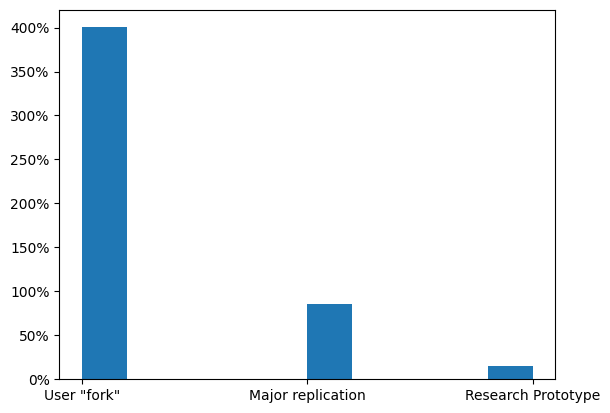

In [16]:
plt.hist(x_axis, density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
